<a href="https://colab.research.google.com/github/susmitkalyan/data_analysis_test/blob/main/Test_Building_Permit_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
print(os.listdir('../input/building-permit-applications-data'))

['DataDictionaryBuildingPermit.xlsx', 'Building_Permits.csv']


In [26]:
import pandas as pd
df = pd.read_csv('../input/building-permit-applications-data/Building_Permits.csv')

<ipython-input-26-2bf95a09bb04>:2: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../input/building-permit-applications-data/Building_Permits.csv')


In [27]:
print("First Few Rows of the Data Set: \n")
print(df.head())

First Few Rows of the Data Set: 

  Permit Number  Permit Type            Permit Type Definition  \
0  201505065519            4                      sign - erect   
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   
3  201611072166            8            otc alterations permit   
4  201611283529            6                       demolitions   

  Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
0           05/06/2015  0326  023            140                  NaN   
1           04/19/2016  0306  007            440                  NaN   
2           05/27/2016  0595  203           1647                  NaN   
3           11/07/2016  0156  011           1230                  NaN   
4           11/28/2016  0342  001            950                  NaN   

  Street Name Street Suffix  ...  Existing Construction Type  \
0       Ellis            St  ...                         3.0   
1 

In [28]:
print("Summary: \n")
print(df.describe())

Summary: 

         Permit Type  Street Number          Unit  Number of Existing Stories  \
count  198900.000000  198900.000000  29479.000000               156116.000000   
mean        7.522323    1121.728944     78.517182                    5.705773   
std         1.457451    1135.768948    326.981324                    8.613455   
min         1.000000       0.000000      0.000000                    0.000000   
25%         8.000000     235.000000      0.000000                    2.000000   
50%         8.000000     710.000000      0.000000                    3.000000   
75%         8.000000    1700.000000      1.000000                    4.000000   
max         8.000000    8400.000000   6004.000000                   78.000000   

       Number of Proposed Stories  Estimated Cost  Revised Cost  \
count               156032.000000    1.608340e+05  1.928340e+05   
mean                     5.745043    1.689554e+05  1.328562e+05   
std                      8.613284    3.630386e+06  3.58490

In [29]:
print("Info:\n")
print(df.info())

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                 

In [30]:
print('Removing rows with missing Estimated Cost and Revised Cost values.')
rows_before = df.shape[0]
print("Rows before Cleaning:",rows_before)
df_cleaned = df.dropna(subset=['Estimated Cost','Revised Cost','Site Permit'])
rows_cleaned = df_cleaned.shape[0]
print("Rows after Cleaning:",rows_cleaned)

Removing rows with missing Estimated Cost and Revised Cost values.
Rows before Cleaning: 198900
Rows after Cleaning: 3440


In [31]:
print("Rows with Zero before filling:\n")
print(df_cleaned[df_cleaned.isnull().any(axis=1)])

Rows with Zero before filling:

       Permit Number  Permit Type            Permit Type Definition  \
176     201707242729            1                  new construction   
193     201708023634            1                  new construction   
583     201301037112            3  additions alterations or repairs   
767     201301047264            2       new construction wood frame   
808     201301047294            3  additions alterations or repairs   
...              ...          ...                               ...   
196886  201607011423            3  additions alterations or repairs   
196887  201607011423            3  additions alterations or repairs   
197056  201601207494            2       new construction wood frame   
198851  201504153737            3  additions alterations or repairs   
198852  201504153735            2       new construction wood frame   

       Permit Creation Date Block   Lot  Street Number Street Number Suffix  \
176              07/24/2017  3794   

In [32]:
print("Filling missing values with 0:\n")
df_filled = df_cleaned.fillna(0)
print(df_filled[df_filled.isnull().any(axis=1)])

Filling missing values with 0:

Empty DataFrame
Columns: [Permit Number, Permit Type, Permit Type Definition, Permit Creation Date, Block, Lot, Street Number, Street Number Suffix, Street Name, Street Suffix, Unit, Unit Suffix, Description, Current Status, Current Status Date, Filed Date, Issued Date, Completed Date, First Construction Document Date, Structural Notification, Number of Existing Stories, Number of Proposed Stories, Voluntary Soft-Story Retrofit, Fire Only Permit, Permit Expiration Date, Estimated Cost, Revised Cost, Existing Use, Existing Units, Proposed Use, Proposed Units, Plansets, TIDF Compliance, Existing Construction Type, Existing Construction Type Description, Proposed Construction Type, Proposed Construction Type Description, Site Permit, Supervisor District, Neighborhoods - Analysis Boundaries, Zipcode, Location, Record ID]
Index: []

[0 rows x 43 columns]


In [33]:
threshold_value = 15
df_filtered = df_filled[df_filled['Number of Existing Stories'] >= threshold_value]
rows_filled = df_filled.shape[0]
rows_filtered = df_filtered.shape[0]
print("No. of Rows after Fill:",rows_filled)
print("No. of Rows after Filter:",rows_filtered)
print("Rows after Filter:\n\n",df_filtered)


No. of Rows after Fill: 3440
No. of Rows after Filter: 13
Rows after Filter:

        Permit Number  Permit Type            Permit Type Definition  \
33959   201312164258            3  additions alterations or repairs   
45138   201404163418            3  additions alterations or repairs   
45139   201404163418            3  additions alterations or repairs   
55251   201407211686            3  additions alterations or repairs   
55739   201407242073            3  additions alterations or repairs   
55964   201407282260            3  additions alterations or repairs   
55965   201407282260            3  additions alterations or repairs   
73516   201501226451            3  additions alterations or repairs   
73517   201501226451            3  additions alterations or repairs   
73518   201501226451            3  additions alterations or repairs   
73519   201501226451            3  additions alterations or repairs   
89414   201506189323            3  additions alterations or repairs  

In [34]:
## Printing the last 5 Rows of a Data Set
print(df_filtered.tail())

       Permit Number  Permit Type            Permit Type Definition  \
73517   201501226451            3  additions alterations or repairs   
73518   201501226451            3  additions alterations or repairs   
73519   201501226451            3  additions alterations or repairs   
89414   201506189323            3  additions alterations or repairs   
171897  201506058287            3  additions alterations or repairs   

       Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
73517            01/22/2015  0813  008           1390                    0   
73518            01/22/2015  0813  009           1390                    0   
73519            01/22/2015  0813  010           1390                    0   
89414            06/18/2015  3701  065           1275                    0   
171897           06/05/2015  3701  065           1275                    0   

       Street Name Street Suffix  ...  Existing Construction Type  \
73517       Market            St  .

In [35]:
import numpy as np

In [36]:
estimated_cost = df_filtered['Estimated Cost'].to_numpy()
revised_cost = df_filtered['Revised Cost'].to_numpy()
existing_units = df_filtered['Existing Units'].to_numpy()
proposed_units = df_filtered['Proposed Units'].to_numpy()
existing_stories = df_filtered['Number of Existing Stories'].to_numpy()
proposed_stories = df_filtered['Number of Proposed Stories'].to_numpy()

In [37]:
# Element-wise Substraction
cost_diff = np.subtract(revised_cost, estimated_cost)
print(cost_diff)

[500000.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.]


In [38]:
# Sorting the Existing Stories
sorted_stories = np.sort(existing_stories)

top_5_stories = sorted_stories[-5:]
bottom_5_stories = sorted_stories[:5]

print('Top 5 Stories:',top_5_stories)
print('Bottom 5 Stories:',bottom_5_stories)

Top 5 Stories: [37. 37. 48. 54. 54.]
Bottom 5 Stories: [17. 17. 23. 29. 29.]


In [39]:
mean_existing_units = np.mean(existing_units)
median_existing_stories = np.median(existing_stories)
avg_estimated_cost = np.average(estimated_cost)

print("Mean of Existing Units:",mean_existing_units)
print("Median of Existing Stories:",median_existing_stories)
print("Average of Estimated Cost:",avg_estimated_cost)

Mean of Existing Units: 223.30769230769232
Median of Existing Stories: 29.0
Average of Estimated Cost: 2980851.846153846


Text(0.5, 1.0, 'Top 5 Building as per Existing Stories')

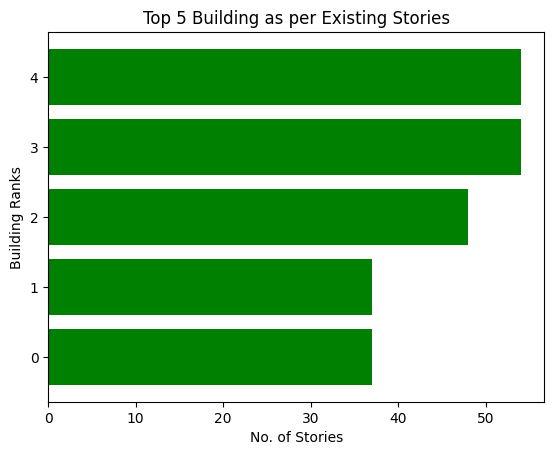

In [40]:
import matplotlib.pyplot as plt
#Plotting Top 5 Tallest Buildings in a Histogram
plt.barh(range(len(top_5_stories)), top_5_stories, color='green')
plt.ylabel('Building Ranks')
plt.xlabel('No. of Stories')
plt.title('Top {} Building as per Existing Stories'.format(len(top_5_stories)))

([<matplotlib.axis.YTick at 0x7bbe5685f4c0>,
 [Text(0, 0, 'Building 1'),
  Text(0, 1, 'Building 2'),
  Text(0, 2, 'Building 3'),
  Text(0, 3, 'Building 4'),
  Text(0, 4, 'Building 5')])

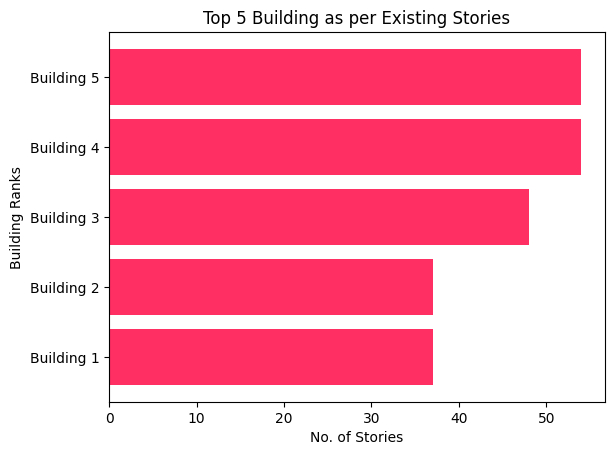

In [41]:
# Customising the Plot Y Labels
plt.barh(range(len(top_5_stories)), top_5_stories, color='#FF2E63')
plt.ylabel('Building Ranks')
plt.xlabel('No. of Stories')
plt.title('Top {} Building as per Existing Stories'.format(len(top_5_stories)))
plt.yticks(range(len(top_5_stories)), ['Building {}'.format(i+1) for i in range(len(top_5_stories))])

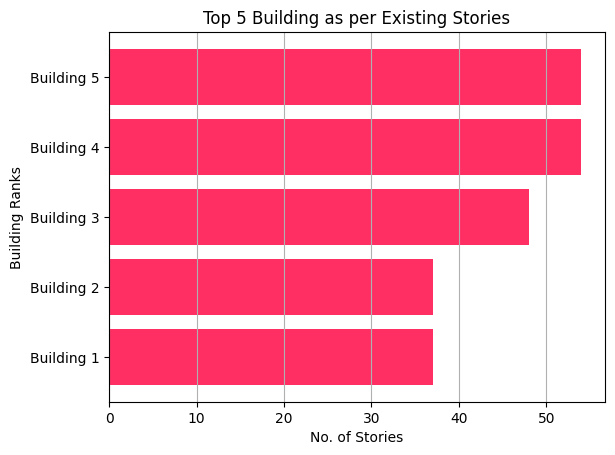

In [42]:
#Adding a Grid across X Axis
plt.barh(range(len(top_5_stories)), top_5_stories, color='#FF2E63')
plt.ylabel('Building Ranks')
plt.xlabel('No. of Stories')
plt.title('Top {} Building as per Existing Stories'.format(len(top_5_stories)))
plt.yticks(range(len(top_5_stories)), ['Building {}'.format(i+1) for i in range(len(top_5_stories))])
plt.grid(axis='x')

In [43]:
print(df_filtered.tail())

       Permit Number  Permit Type            Permit Type Definition  \
73517   201501226451            3  additions alterations or repairs   
73518   201501226451            3  additions alterations or repairs   
73519   201501226451            3  additions alterations or repairs   
89414   201506189323            3  additions alterations or repairs   
171897  201506058287            3  additions alterations or repairs   

       Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
73517            01/22/2015  0813  008           1390                    0   
73518            01/22/2015  0813  009           1390                    0   
73519            01/22/2015  0813  010           1390                    0   
89414            06/18/2015  3701  065           1275                    0   
171897           06/05/2015  3701  065           1275                    0   

       Street Name Street Suffix  ...  Existing Construction Type  \
73517       Market            St  .